In [ ]:
#len(set(sc_df.index).intersection(gloc.index)) #24826 - 54 = 24772 # before filtering out chromosomes
#len(set(sc_df_filtered.index).intersection(gloc.index)) # 24083 - 38 = 24045
##set(sc_df_filtered.index) - set(gloc.index)
##set(sc_df.index) - set(gloc.index)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [26]:
excl_chrom = ['chrM','chrX','chrY']
chromosomes = set(gloc.seqname).difference(excl_chrom)
# read in single cell TPM counts
sc_df = pd.read_csv("../data/single_cell_tpm.tsv",sep="\t",index_col=0)
# filter out genes with 0 TPM in all cells
sc_df_filtered = sc_df.loc[np.sum(sc_df,axis=1)!=0] # -743
# read in gene location information
gloc = pd.read_csv("../data/gene_locations.tsv",sep="\t",index_col=0)
gloc_filtered = gloc[gloc['seqname'].isin(chromosomes)]
# read in TAD location information
tad_locs = pd.read_csv("../data/TAD_strong_boundary_start_end.csv")
tad_locs = tad_locs[tad_locs['chrom'].isin(chromosomes)]

# get intersecting genes
gene_list = set(sc_df_filtered.index).intersection(gloc_filtered.index)
sc_df_filtered = sc_df_filtered.loc[gene_list]
gloc_filtered = gloc_filtered.loc[gene_list]

In [12]:
gloc_filtered

,seqname,start,end,gene_name
gene_id,,,,
ENSMUSG00000082870,chr11,46036440,46036781,Gm12165
ENSMUSG00000082949,chr4,30701973,30702535,Gm11920
ENSMUSG00000020121,chr10,121780991,122047315,Srgap1
ENSMUSG00000028039,chr3,89313899,89322965,Efna3
ENSMUSG00000090071,chr1,74854934,74857732,Cdk5r2
...,...,...,...,...
ENSMUSG00000101896,chr1,83212044,83212884,Gm6244
ENSMUSG00000034329,chr11,86058138,86201193,Brip1
ENSMUSG00000107573,chr11,49423067,49432968,Olfr1389


In [29]:
gloc_filtered[gloc_filtered.seqname=='chr1']

,seqname,start,end,gene_name
gene_id,,,,
ENSMUSG00000090071,chr1,74854934,74857732,Cdk5r2
ENSMUSG00000097264,chr1,64934402,64934780,Rpl31-ps24
ENSMUSG00000026274,chr1,93308770,93343482,Pask
ENSMUSG00000042708,chr1,153425162,153452574,Shcbp1l
ENSMUSG00000103073,chr1,166798528,166798839,Gm37904
...,...,...,...,...
ENSMUSG00000100894,chr1,45602026,45602753,Gm8304
ENSMUSG00000099875,chr1,150265535,150265999,Rbm3-ps
ENSMUSG00000025968,chr1,63143596,63176833,Ndufs1


In [27]:
tad_locs

,chrom,start,end
0,chr1,3185000.0,3225000.0
1,chr1,3225000.0,3295000.0
2,chr1,3295000.0,3545000.0
3,chr1,3545000.0,3665000.0
4,chr1,3665000.0,3865000.0
...,...,...,...
15840,chr19,60585000.0,60675000.0
15841,chr19,60675000.0,60745000.0
15842,chr19,60745000.0,60895000.0
15843,chr19,60895000.0,61095000.0


In [ ]:
sc1 = sc_df_filtered.loc[gloc_filtered[gloc_filtered['seqname']=='chr1'].index]


In [33]:
len(tad_locs)

15845

In [18]:
tad_locs.loc[0]['start']

3185000.0

In [ ]:
sc_df_filtered.loc[gloc_filtered[gloc_filtered['seqname']=='chr1'].index]

In [ ]:
sc_df_filtered.loc[gloc[gloc['seqname']=='chr1'].index]

In [ ]:
zscore(np.log2(sc_df_filtered+1),axis=1)

In [32]:
def get_genes_in_interval(chrom,start,end,gloc):
    """
    get genes in an interval on a chromosome
    """
    gloc_chr = gloc[gloc['seqname']==chrom]
    gloc_chr = gloc_chr[(gloc_chr['start'] >= start) & (gloc_chr['end'] < end)]
    return list(gloc_chr.index)

In [35]:
tg_dict = dict(zip(list(range(len(tad_locs))),[[]]*len(tad_locs)))
for i in range(len(tad_locs)):
    data = tad_locs.loc[i]
    tg_dict[i] = get_genes_in_interval(data['chrom'],data['start'],data['end'],gloc_filtered)
tg_dict

{0: [],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: ['ENSMUSG00000102948'],
 9: [],
 10: ['ENSMUSG00000102269', 'ENSMUSG00000025902'],
 11: ['ENSMUSG00000098104', 'ENSMUSG00000102175'],
 12: ['ENSMUSG00000025903', 'ENSMUSG00000033845', 'ENSMUSG00000103922'],
 13: ['ENSMUSG00000062588'],
 14: ['ENSMUSG00000033793'],
 15: [],
 16: [],
 17: ['ENSMUSG00000025905'],
 18: [],
 19: ['ENSMUSG00000033774'],
 20: [],
 21: ['ENSMUSG00000087247', 'ENSMUSG00000025907', 'ENSMUSG00000103355'],
 22: ['ENSMUSG00000103845'],
 23: [],
 24: ['ENSMUSG00000102135', 'ENSMUSG00000104385'],
 25: [],
 26: [],
 27: ['ENSMUSG00000048538', 'ENSMUSG00000098201'],
 28: [],
 29: [],
 30: [],
 31: [],
 32: ['ENSMUSG00000103903'],
 33: [],
 34: [],
 35: [],
 36: [],
 37: [],
 38: [],
 39: [],
 40: ['ENSMUSG00000086235'],
 41: [],
 42: [],
 43: ['ENSMUSG00000104504', 'ENSMUSG00000084353', 'ENSMUSG00000086195'],
 44: [],
 45: [],
 46: [],
 47: ['ENSMUSG00000103819'],
 48: ['ENSMUSG00000101571'],
 49: [],


In [38]:
len(tg_dict.keys())

15845

In [37]:
new_tg_dict = {k:v for k,v in tg_dict.items() if v}
new_tg_dict

{8: ['ENSMUSG00000102948'],
 10: ['ENSMUSG00000102269', 'ENSMUSG00000025902'],
 11: ['ENSMUSG00000098104', 'ENSMUSG00000102175'],
 12: ['ENSMUSG00000025903', 'ENSMUSG00000033845', 'ENSMUSG00000103922'],
 13: ['ENSMUSG00000062588'],
 14: ['ENSMUSG00000033793'],
 17: ['ENSMUSG00000025905'],
 19: ['ENSMUSG00000033774'],
 21: ['ENSMUSG00000087247', 'ENSMUSG00000025907', 'ENSMUSG00000103355'],
 22: ['ENSMUSG00000103845'],
 24: ['ENSMUSG00000102135', 'ENSMUSG00000104385'],
 27: ['ENSMUSG00000048538', 'ENSMUSG00000098201'],
 32: ['ENSMUSG00000103903'],
 40: ['ENSMUSG00000086235'],
 43: ['ENSMUSG00000104504', 'ENSMUSG00000084353', 'ENSMUSG00000086195'],
 47: ['ENSMUSG00000103819'],
 48: ['ENSMUSG00000101571'],
 50: ['ENSMUSG00000081441',
  'ENSMUSG00000025911',
  'ENSMUSG00000025912',
  'ENSMUSG00000061024'],
 51: ['ENSMUSG00000045210'],
 52: ['ENSMUSG00000025915', 'ENSMUSG00000046101', 'ENSMUSG00000046334'],
 53: ['ENSMUSG00000067851',
  'ENSMUSG00000025917',
  'ENSMUSG00000056763',
  'ENSMUS

In [39]:
len(new_tg_dict.keys())

7879

In [43]:
final_tg_dict = {k:v for k,v in tg_dict.items() if len(v)>2}
final_tg_dict

{12: ['ENSMUSG00000025903', 'ENSMUSG00000033845', 'ENSMUSG00000103922'],
 21: ['ENSMUSG00000087247', 'ENSMUSG00000025907', 'ENSMUSG00000103355'],
 43: ['ENSMUSG00000104504', 'ENSMUSG00000084353', 'ENSMUSG00000086195'],
 50: ['ENSMUSG00000081441',
  'ENSMUSG00000025911',
  'ENSMUSG00000025912',
  'ENSMUSG00000061024'],
 52: ['ENSMUSG00000025915', 'ENSMUSG00000046101', 'ENSMUSG00000046334'],
 53: ['ENSMUSG00000067851',
  'ENSMUSG00000025917',
  'ENSMUSG00000056763',
  'ENSMUSG00000099032'],
 89: ['ENSMUSG00000081201',
  'ENSMUSG00000025930',
  'ENSMUSG00000082193',
  'ENSMUSG00000032769'],
 101: ['ENSMUSG00000025940', 'ENSMUSG00000079658', 'ENSMUSG00000025939'],
 131: ['ENSMUSG00000041859', 'ENSMUSG00000099714', 'ENSMUSG00000041872'],
 136: ['ENSMUSG00000096375',
  'ENSMUSG00000025933',
  'ENSMUSG00000100819',
  'ENSMUSG00000025934'],
 161: ['ENSMUSG00000100131',
  'ENSMUSG00000102070',
  'ENSMUSG00000101939',
  'ENSMUSG00000100862',
  'ENSMUSG00000067736',
  'ENSMUSG00000101249',
  'ENS

In [44]:
len(final_tg_dict)

2238

In [59]:
np.percentile([len(l) for l in tg_dict.values()],99)

9.0

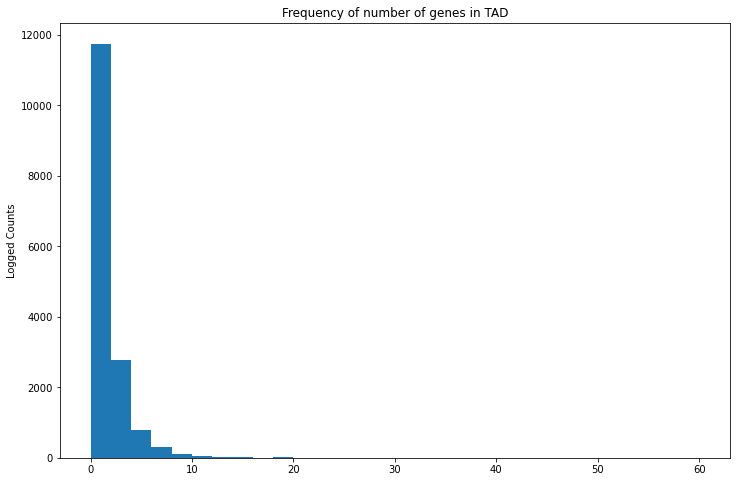

In [55]:
plt.rcParams["figure.figsize"] = (12,8)
plt.hist([len(l) for l in tg_dict.values()],bins=30)
plt.title("Frequency of number of genes in TAD")
plt.ylabel("Logged Counts")
plt.show()